In [1]:
using QuantumDynamics
using Plots
using LinearAlgebra

In [2]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

In [3]:
ϵ0 = 0.0 # This appears to not change the dynamics at all
ϵb = 134.0

134.0

In [5]:
N = 2

2

In [6]:
H0 = Matrix{ComplexF64}(zeros(N, N))

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

In [7]:
for i in 1:N
    H0[i,i] = ϵ0
    if i <= N-1
        H0[i, i+1] = ϵb
    end
    if i >= 2
        H0[i, i-1] = ϵb
    end
end

In [8]:
H0 = H0 * invcm2au

2×2 Matrix{ComplexF64}:
         0.0+0.0im  0.000610548+0.0im
 0.000610548+0.0im          0.0+0.0im

In [9]:
svec = Matrix{Float64}(zeros(1, N))
for i in 1:N
    svec[i] = i
end
svec

1×2 Matrix{Float64}:
 1.0  2.0

In [11]:
dt = 0.1/au2fs
nsteps = 10000
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (300 * 3.16683e-6) # T = 300K

1052.5772881188234

In [18]:
# HEOM

λs = repeat([135.0], N) * mev2au
γs = repeat([150.0], N) * mev2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(N, N)
    op[j, j] = 1.0
    push!(sys_ops, op)
end

n_set = [1, 2, 3]
L_set = [1, 2, 3, 4, 5, 6]

tset = []
ρset = []

for n in n_set
    for L in L_set
        times_HEOM, ρs_HEOM = HEOM.propagate(; Hamiltonian=H0, ρ0, β, dt, ntimes=nsteps, Jw=JwH, sys_ops=sys_ops, num_modes=n, Lmax=L)
        push!(tset, times_HEOM)
        push!(ρset, ρs_HEOM)
        plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="L = $L, n = $n")
    end
end
savefig("HEOM-iterate-TLS")

"/home/pranay/PathsRFun/polaron-mobility/HEOM-iterate-TLS.png"

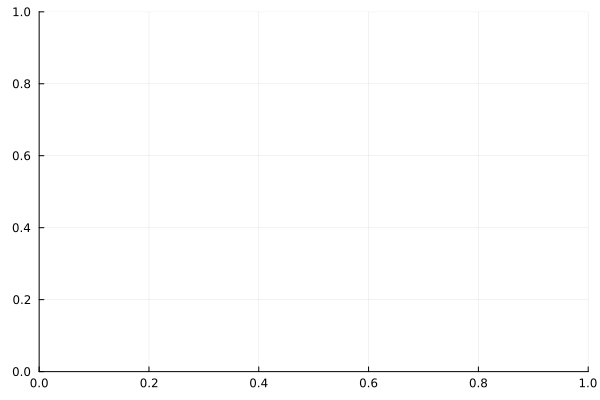

In [53]:
plot()


In [48]:
for i in 1:6
    ts = tset[i]
    ρs = ρset[i]
    plot!(ts, real.(ρs[:, 1, 1]), label="L = $i", title="num_modes=1")
end

In [55]:
savefig("HEOM-iterate-TLS-3")

"/home/pranay/PathsRFun/polaron-mobility/HEOM-iterate-TLS-3.png"

In [51]:
for i in 7:12
    ts = tset[i]
    ρs = ρset[i]
    k = i - 6
    plot!(ts, real.(ρs[:, 1, 1]), label="L = $k", title="num_modes=2")
end

In [54]:
for i in 13:18
    ts = tset[i]
    ρs = ρset[i]
    k = i - 12
    plot!(ts, real.(ρs[:, 1, 1]), label="L = $k", title="num_modes=3")
end

Looks like increasing num_modes makes the inaccurate solutions more inaccurate but doesn't seem to have an insane effect on the accurate solutions

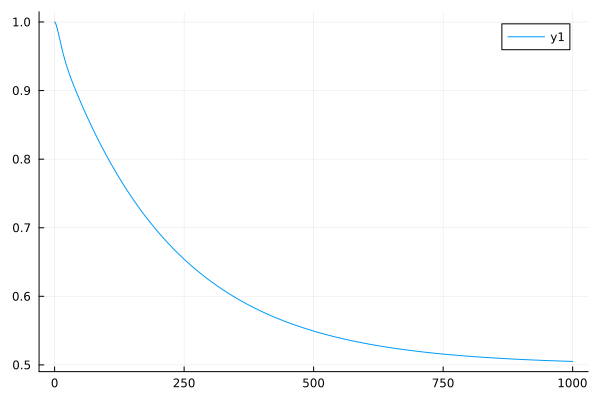

In [14]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]))